In [1]:
import pandas as  pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns

In [2]:
crash=pd.read_csv('CDS_all.csv', encoding = "utf-8")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
allCrash = crash.loc[crash.PARK_ALPHA != 'ZZZZ']
allCrash = allCrash[allCrash['CRASH_DATE'].notna()]

In [4]:
allCrash['CRASH_DATE']=pd.to_datetime(allCrash['CRASH_DATE'])
allCrash['day_of_week'] = allCrash['CRASH_DATE'].dt.day_name()
allCrash['hour'] = (allCrash['CRASH_TIME']/100).astype(int) *100
allCrash['year'] = allCrash['CRASH_DATE'].dt.year
mask = (allCrash['year'] > 2007) & (allCrash['year'] <= 2011)
allCrash = allCrash.loc[mask]

In [5]:
allCrash['month'] = allCrash['CRASH_DATE'].dt.month

In [6]:
YELLcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'YELL']
YELLcrashes

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour,year,month
78354,79593,YELL111221020000,116163,YELL,IMR,1,NaN,2011-12-21,200.0,18,...,NaN,00:00.0,NaN,C3,15.554,1,Wednesday,200,2011,12
78355,79592,YELL111217103000,116139,YELL,IMR,1,WY,2011-12-17,1030.0,201,...,NaN,00:00.0,YELL-0201,C3,0.691,1,Saturday,1000,2011,12
78356,79591,YELL111209174500,116098,YELL,IMR,1,WY,2011-12-09,1745.0,10,...,NaN,00:00.0,YELL-0010,C3,29.631,1,Friday,1700,2011,12
78357,79590,YELL111205053500,116078,YELL,IMR,1,WY,2011-12-05,535.0,10,...,NaN,00:00.0,YELL-0010,C3,34.836,1,Monday,500,2011,12
78358,79589,YELL111127204000,116057,YELL,IMR,1,WY,2011-11-27,2040.0,11,...,NaN,00:00.0,YELL-0011,C3,4.785,1,Sunday,2000,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80246,78089,YELL080305150000,80596,YELL,IMR,1,WY,2008-03-05,1500.0,14,...,NaN,00:00.0,YELL-0014,C3,0.010,1,Wednesday,1500,2008,3
80247,78088,YELL080304160000,80545,YELL,IMR,1,WY,2008-03-04,1600.0,10,...,NaN,00:00.0,YELL-0010,C3,20.981,1,Tuesday,1600,2008,3
80248,78065,YELL080111141500,80075,YELL,IMR,1,WY,2008-01-11,1415.0,10,...,NaN,00:00.0,YELL-0010,C3,4.786,1,Friday,1400,2008,1
80249,78062,YELL080107094500,80043,YELL,IMR,1,WY,2008-01-07,945.0,14,...,NaN,00:00.0,YELL-0014,C3,20.019,1,Monday,900,2008,1


[Text(0.5, 1.0, 'Number of Crashes by Hour 2008-2011')]

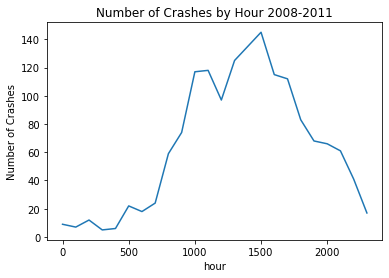

In [7]:
df_time_grouped=YELLcrashes.groupby(['hour']).count()
df_time_grouped=df_time_grouped.reset_index()
df_time_grouped=df_time_grouped[['hour','# Crash']].sort_values(by='hour')
df_time_grouped.rename(columns={'# Crash': 'Number of Crashes'}, inplace=True)
sns.lineplot(data=df_time_grouped, x="hour", y="Number of Crashes").set(title='Number of Crashes by Hour 2008-2011')

In [8]:
df_day_groupedIMR=YELLcrashes.groupby(['day_of_week']).count()
df_day_groupedIMR=df_day_groupedIMR.reset_index()
df_day_groupedIMR=df_day_groupedIMR[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_groupedIMR=df_day_groupedIMR.reindex([1,5,6,4,0,2,3])
df_day_groupedIMR

,day_of_week,number_of_crashes
1,Monday,208
5,Tuesday,230
6,Wednesday,204
4,Thursday,236
0,Friday,217
2,Saturday,214
3,Sunday,227


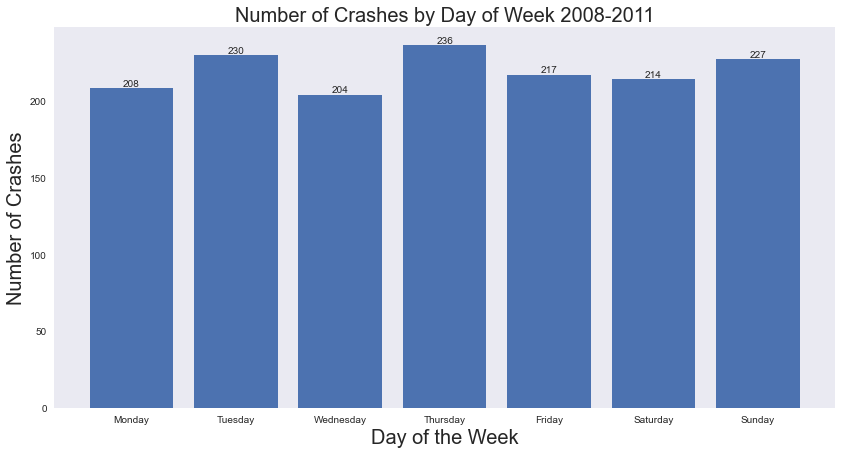

In [9]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_groupedIMR.day_of_week, df_day_groupedIMR.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week 2008-2011', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid(False)
plt.rc('axes', labelsize=10) 

for i in range(len(df_day_groupedIMR.day_of_week)):
    plt.annotate(str(df_day_groupedIMR.number_of_crashes[i]), xy=(df_day_groupedIMR.day_of_week[i],df_day_groupedIMR.number_of_crashes[i]), ha='center', va='bottom',fontsize=10)
                                                                    
plt.show()

In [10]:
df_light_groupedIMR=YELLcrashes.groupby(['LIGHT']).count()
df_light_groupedIMR=df_light_groupedIMR.reset_index()
df_light_groupedIMR=df_light_groupedIMR[['LIGHT','# Crash']].sort_values(by='LIGHT')
df_light_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_light_groupedIMR.rename(columns={'LIGHT': 'LightingConditionCode'}, inplace=True)
df_light_groupedIMR['LightingCondition']=['Daylight','Dawn','Dusk','Dark-Lighted','Dark-Not Lighted','Blank','Unknown']
df_light_groupedIMR=df_light_groupedIMR.sort_values(by=['number_of_crashes'])
df_light_groupedIMR=df_light_groupedIMR.drop(['LightingConditionCode'], axis=1)
df_light_groupedIMR

,number_of_crashes,LightingCondition
6,9,Unknown
1,17,Dawn
3,25,Dark-Lighted
5,29,Blank
2,67,Dusk
4,168,Dark-Not Lighted
0,1219,Daylight


In [39]:
df_weather_groupedIMR=YELLcrashes.groupby(['WEATHER']).count()
df_weather_groupedIMR=df_weather_groupedIMR.reset_index()
df_weather_groupedIMR=df_weather_groupedIMR[['WEATHER','# Crash']].sort_values(by='WEATHER')
df_weather_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_weather_groupedIMR.rename(columns={'WEATHER': 'WeatherConditionCode'}, inplace=True)
df_weather_groupedIMR['WeatherCondition']=['Clear','Cloudy','Rain','Snow','Fog,Smog,Smoke','Sleet,Hail,Freezing Rain','Severe Crosswinds','Other','Blank','Unknown']
df_weather_groupedIMR=df_weather_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_weather_groupedIMR=df_weather_groupedIMR.drop([8,9])
df_weather_groupedIMR=df_weather_groupedIMR.reset_index()
df_weather_groupedIMR

,index,WeatherConditionCode,number_of_crashes,WeatherCondition
0,0,1.0,1072,Clear
1,1,2.0,248,Cloudy
2,3,4.0,90,Snow
3,2,3.0,65,Rain
4,4,5.0,8,"Fog,Smog,Smoke"
5,6,8.0,5,Severe Crosswinds
6,5,6.0,2,"Sleet,Hail,Freezing Rain"
7,7,88.0,2,Other


In [34]:
df_location_groupedIMR=YELLcrashes.groupby(['CRASH_LOCATION']).count()
df_location_groupedIMR=df_location_groupedIMR.reset_index()
df_location_groupedIMR=df_location_groupedIMR[['CRASH_LOCATION','# Crash']].sort_values(by='CRASH_LOCATION')
df_location_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_location_groupedIMR.rename(columns={'CRASH_LOCATION': 'LocationTypeCode'}, inplace=True)
df_location_groupedIMR['LocationType']=['Intersection On Roadway','Parking/Driveway Access On Roadway','Interchange On Roadway','Bridge On Roadway','Work Zone On Roadway','On Roadway-Other','On Roadway-In Lane','Parking Lot Off Roadway','Turnout/Overlook Off Roadway','Roadside','Median','Off Roadway Other','Gore','Blank','Unknown']
df_location_groupedIMR=df_location_groupedIMR.sort_values(by=['number_of_crashes'])
df_location_groupedIMR

,LocationTypeCode,number_of_crashes,LocationType
6,17.0,2,On Roadway-In Lane
2,13.0,4,Interchange On Roadway
10,24.0,4,Median
14,99.0,7,Unknown
12,30.0,11,Gore
3,14.0,14,Bridge On Roadway
4,15.0,19,Work Zone On Roadway
13,98.0,48,Blank
8,22.0,54,Turnout/Overlook Off Roadway
0,11.0,68,Intersection On Roadway


In [13]:
pd.set_option('display.max_columns', None)
YELLcrashes.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,RTE_NAME,NODE_DIST_FT,NODE_DIST_MI,NODE_DIR,NODE_NUM,LIGHT,WEATHER,CRASH_LOCATION,SURF_COND,CRASH_CLASS,VEH_COLL,OBJ_STRUCK,ROAD_CHAR,CON_FACT1,CON_FACT2,CON_FACT3,CON_FACT4,CON_FACT5,CON_FACT6,HIT_RUN,CATEGORY,FATALS,INJURED,PED_FAT,PED_INJ,BIKE_FAT,BIKE_INJ,PED,CRASH_YEAR,COMMENTS,ZIPFILE,LOCATION,PHOTOS_TAKEN,USPP_NPS_VEH_INV,PARK_PTY_DEST,LOCKED_UPDATE,LOCKED_BY_USER,DATA_SRC,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour,year,month
78354,79593,YELL111221020000,116163,YELL,IMR,1,NaN,2011-12-21,200.0,18,US HIGHWAY 191,0.0,2.10,S,8330,5.0,4.0,16.0,4.0,0.0,0.0,0.0,3.0,B05,B08,C08,E02,NaN,NaN,0.0,PD ONLY,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,MILEPOST 28.5 IN THE ROADWAY,1.0,0.0,0.0,0.0,NaN,MANL,45.03303,-111.11227,17.654,NaN,NaN,00:00.0,NaN,C3,15.554,1,Wednesday,200,2011,12
78355,79592,YELL111217103000,116139,YELL,IMR,1,WY,2011-12-17,1030.0,201,GRANT MARINA ROAD,0.0,0.50,E,201D,1.0,1.0,16.0,4.0,2.0,0.0,4.0,4.0,A06,A16,B08,NaN,NaN,NaN,0.0,PD ONLY,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,Updated ROUTE_IDEN based on NODENUM,NaN,Approx 0.5 mi East from Grant Marina Road Junc...,1.0,0.0,1.0,0.0,NaN,MANL,44.38738,-110.55450,0.191,NaN,NaN,00:00.0,YELL-0201,C3,0.691,1,Saturday,1000,2011,12
78356,79591,YELL111209174500,116098,YELL,IMR,1,WY,2011-12-09,1745.0,10,GRAND LOOP ROAD,0.0,0.00,S,300,5.0,1.0,16.0,3.0,7.0,0.0,0.0,4.0,E02,A16,NaN,NaN,NaN,NaN,0.0,PD ONLY,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,IRON SPRINGS,1.0,0.0,0.0,0.0,NaN,MANL,44.65203,-110.77159,29.631,NaN,NaN,00:00.0,YELL-0010,C3,29.631,1,Friday,1700,2011,12
78357,79590,YELL111205053500,116078,YELL,IMR,1,WY,2011-12-05,535.0,10,GRAND LOOP ROAD,0.0,0.25,N,349,4.0,1.0,16.0,4.0,7.0,0.0,0.0,4.0,A06,B06,E02,NaN,NaN,NaN,0.0,PD ONLY,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,3/4 OFA MILE SOUTH OF MADISON JUNCTION,1.0,0.0,0.0,0.0,NaN,MANL,44.63603,-110.85813,35.086,NaN,NaN,00:00.0,YELL-0010,C3,34.836,1,Monday,500,2011,12
78358,79589,YELL111127204000,116057,YELL,IMR,1,WY,2011-11-27,2040.0,11,NORTH ENTRANCE ROAD,0.0,1.00,N,9048,5.0,1.0,16.0,1.0,7.0,0.0,0.0,1.0,B06,NaN,NaN,NaN,NaN,NaN,0.0,PD ONLY,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,1 MILE SOUTH OF ENTRANCE STATION,1.0,0.0,0.0,0.0,NaN,MANL,45.01311,-110.69374,3.785,NaN,NaN,00:00.0,YELL-0011,C3,4.785,1,Sunday,2000,2011,11


In [37]:
injury['HIT_RUN'].sum()

2.0

In [15]:
YELLcrashes['BIKE_INJ'].sum()

0.0

In [16]:
injury = YELLcrashes.loc[YELLcrashes.CATEGORY == 'INJURY']

In [17]:
injury['INJURED'].sum()

194.0

In [18]:
df_class_groupedYELL=injury.groupby(['CRASH_CLASS']).count()
df_class_groupedYELL=df_class_groupedYELL.reset_index()
df_class_groupedYELL=df_class_groupedYELL[['CRASH_CLASS','# Crash']].sort_values(by='CRASH_CLASS')
df_class_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_class_groupedYELL.rename(columns={'CRASH_CLASS': 'CrashClassCode'}, inplace=True)
df_class_groupedYELL['CrashClass']=['Non-collision','Collision with Other Motor Vehicle','Collision with Fixed Object','Collision with Pedestrian','Collision with Pedalcycle','Collision with Animal','Collision with Other Object','Blank','Unknown']
df_class_groupedYELL=df_class_groupedYELL.sort_values(by=['number_of_crashes'],ascending=False)
df_class_groupedYELL

,CrashClassCode,number_of_crashes,CrashClass
0,0.0,46,Non-collision
1,1.0,41,Collision with Other Motor Vehicle
2,2.0,34,Collision with Fixed Object
6,88.0,8,Collision with Other Object
5,7.0,5,Collision with Animal
7,98.0,5,Blank
3,3.0,2,Collision with Pedestrian
4,4.0,1,Collision with Pedalcycle
8,99.0,1,Unknown


In [36]:
df_route_groupedIMR=injury.groupby(['RTE_NAME','ROUTE_IDENT']).count()
df_route_groupedIMR=df_route_groupedIMR.reset_index()
df_route_groupedIMR=df_route_groupedIMR[['RTE_NAME','ROUTE_IDENT','# Crash']].sort_values(by='RTE_NAME')
df_route_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_route_groupedIMR.rename(columns={'RTE_NAME': 'RouteName'}, inplace=True)
df_route_groupedIMR=df_route_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_route_groupedIMR.head(25)

,RouteName,ROUTE_IDENT,number_of_crashes
2,GRAND LOOP ROAD,YELL-0010,76
1,EAST ENTRANCE ROAD,YELL-0013,13
14,WEST ENTRANCE ROAD,YELL-0015,12
12,SOUTH ENTRANCE ROAD,YELL-0014,9
9,NORTHEAST ENTRANCE ROAD,YELL-0012,5
5,NORRIS CANYON ROAD,YELL-0016,4
0,BRIDGE BAY CAMPGROUND ROAD,YELL-0109,1
3,GRAND LOOP ROAD,YELL-0014,1
4,LAKE RESIDENCE AREA ROAD,YELL-0010,1
6,NORRIS TO MAMMOTH/GRAND LOOP ROAD,YELL-0010,1


In [20]:
YELLcrashes.columns

Index(['OBJECTID', 'INCID_NO', 'CASE_NUM', 'PARK_ALPHA', 'Region', '# Crash',
       'STATE_CODE', 'CRASH_DATE', 'CRASH_TIME', 'RTE_NO', 'RTE_NAME',
       'NODE_DIST_FT', 'NODE_DIST_MI', 'NODE_DIR', 'NODE_NUM', 'LIGHT',
       'WEATHER', 'CRASH_LOCATION', 'SURF_COND', 'CRASH_CLASS', 'VEH_COLL',
       'OBJ_STRUCK', 'ROAD_CHAR', 'CON_FACT1', 'CON_FACT2', 'CON_FACT3',
       'CON_FACT4', 'CON_FACT5', 'CON_FACT6', 'HIT_RUN', 'CATEGORY', 'FATALS',
       'INJURED', 'PED_FAT', 'PED_INJ', 'BIKE_FAT', 'BIKE_INJ', 'PED',
       'CRASH_YEAR', 'COMMENTS', 'ZIPFILE', 'LOCATION', 'PHOTOS_TAKEN',
       'USPP_NPS_VEH_INV', 'PARK_PTY_DEST', 'LOCKED_UPDATE', 'LOCKED_BY_USER',
       'DATA_SRC', 'LATITUDE', 'LONGITUDE', 'MILEPOST', 'IMPORT_DATE',
       'FILE_NAME', 'SAVE_DATE', 'ROUTE_IDENT', 'RIP_CYCLE', 'MP_NODE',
       'SPTL_LOC', 'day_of_week', 'hour', 'year', 'month'],
      dtype='object')

In [31]:
df_class_groupedYELL=injury.groupby(['OBJ_STRUCK']).count()
df_class_groupedYELL=df_class_groupedYELL.reset_index()
df_class_groupedYELL=df_class_groupedYELL[['OBJ_STRUCK','# Crash']].sort_values(by='OBJ_STRUCK')
df_class_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_class_groupedYELL.rename(columns={'OBJ_STRUCK': 'Object Code'}, inplace=True)
#df_class_groupedYELL['Object']=['Non-collision','Collision with Other Motor Vehicle','Collision with Fixed Object','Collision with Pedestrian','Collision with Pedalcycle','Collision with Animal','Collision with Other Object','Blank','Unknown']
#df_class_groupedYELL=df_class_groupedYELL.sort_values(by=['number_of_crashes'],ascending=False)
df_class_groupedYELL

,Object Code,number_of_crashes
0,0.0,89
1,1.0,3
2,2.0,4
3,3.0,1
4,4.0,26
5,10.0,3
6,11.0,6
7,12.0,3
8,88.0,3
9,98.0,5


In [32]:

df_class_groupedYELL=injury.groupby(['CON_FACT1']).count()
df_class_groupedYELL=df_class_groupedYELL.reset_index()
df_class_groupedYELL=df_class_groupedYELL[['CON_FACT1','# Crash']].sort_values(by='CON_FACT1')
# df_class_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
# df_class_groupedYELL.rename(columns={'OBJ_STRUCK': 'Object Code'}, inplace=True)
#df_class_groupedYELL['Object']=['Non-collision','Collision with Other Motor Vehicle','Collision with Fixed Object','Collision with Pedestrian','Collision with Pedalcycle','Collision with Animal','Collision with Other Object','Blank','Unknown']
df_class_groupedYELL=df_class_groupedYELL.sort_values(by=['# Crash'],ascending=False)
df_class_groupedYELL.head()

,CON_FACT1,# Crash
11,A16,42
10,A15,17
4,A06,15
13,A88,12
15,B06,10


In [27]:
df_month_groupedYELL=YELLcrashes.groupby(['month']).count()
df_month_groupedYELL=df_month_groupedYELL.reset_index()
df_month_groupedYELL=df_month_groupedYELL[['month','# Crash']].sort_values(by='month')
df_month_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_month_groupedYELL['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
df_month_groupedYELL

,month,number_of_crashes,Month
0,1,49,January
1,2,38,February
2,3,36,March
3,4,27,April
4,5,93,May
5,6,242,June
6,7,358,July
7,8,358,August
8,9,196,September
9,10,82,October


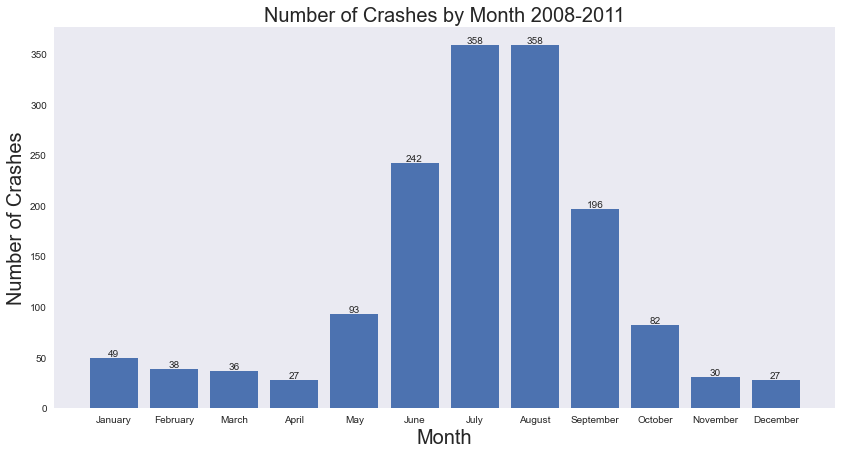

In [30]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_month_groupedYELL.Month, df_month_groupedYELL.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Month 2008-2011', fontsize=20)

ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid(False)
plt.rc('axes', labelsize=10) 

for i in range(len(df_month_groupedYELL.Month)):
    plt.annotate(str(df_month_groupedYELL.number_of_crashes[i]), xy=(df_month_groupedYELL.Month[i],df_month_groupedYELL.number_of_crashes[i]), ha='center', va='bottom',fontsize=10)
                                                                    
plt.show()

In [35]:
df_location_groupedIMR=injury.groupby(['CRASH_LOCATION']).count()
df_location_groupedIMR=df_location_groupedIMR.reset_index()
df_location_groupedIMR=df_location_groupedIMR[['CRASH_LOCATION','# Crash']].sort_values(by='CRASH_LOCATION')
df_location_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_location_groupedIMR.rename(columns={'CRASH_LOCATION': 'LocationTypeCode'}, inplace=True)
#df_location_groupedIMR['LocationType']=['Intersection On Roadway','Parking/Driveway Access On Roadway','Interchange On Roadway','Bridge On Roadway','Work Zone On Roadway','On Roadway-Other','On Roadway-In Lane','Parking Lot Off Roadway','Turnout/Overlook Off Roadway','Roadside','Median','Off Roadway Other','Gore','Blank','Unknown']
df_location_groupedIMR=df_location_groupedIMR.sort_values(by=['number_of_crashes'])
df_location_groupedIMR

,LocationTypeCode,number_of_crashes
2,13.0,1
6,17.0,1
11,30.0,1
3,14.0,2
7,21.0,2
1,12.0,3
4,15.0,3
8,22.0,4
12,98.0,6
10,25.0,8
